In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

import pydot

In [2]:
tf.__version__

'2.1.0'

#### Load the datasets for keras

##### Fashion mnist datasets

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

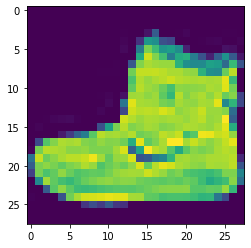

In [4]:
plt.imshow(X_train_full[0])

In [5]:
y_train_full[1]

0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train_full[1]]

'T-shirt/top'

In [8]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization
This is done to achieve the same scale in the data dimention. Since we know the range of our data which 0-255 thus we divide the data with 255

In [9]:
X_train_sca = X_train_full / 255.
X_test_sca = X_test / 255.

### Split the data into train, valdation and test

In [10]:
X_valid, X_train = X_train_sca[:5000], X_train_sca[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Assigning X_test_sca to X_test
X_test_sca = X_test

In [11]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crete the model architecture
There are two APIs for defining a model in keras:
* Sequential model API: It is simple and it is use to create layer by layer model. All output of the previous layers are connected to the input of next layer

* Funtional API: It is for a complex model. It is recommended when input will be supplied as difference layer


# Sequential model API
Sequential model API will be used in this session and functional model API will follow accordingly

In [12]:
# this is to achieve the result 

np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# create a model using the sequential
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten is used to convert the 28x28 array of the dataset to pixel
model.add(keras.layers.Dense(300, activation='relu')) # 300 rep the neurons 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Patience or EarlyStopping 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


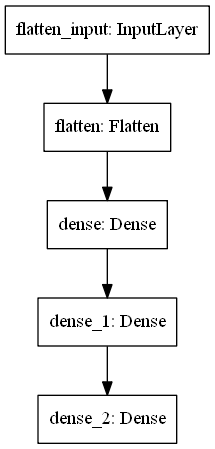

In [15]:
# display the network using pydot

keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

## Training of the dataset
Note:

The 'loss' value is chosen because y data is in form of label, that is wee have 10 labels e.g boot etc.

sgd: Stochastic Gradient Descent, this is telling keras to do Back propagation algorithm

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=['accuracy'])

In [22]:
model_history = model.fit(X_train, y_train, epochs=20,
                         validation_data=(X_valid, y_valid), callbacks=[callback])

In [23]:
model_history.params

{'batch_size': 32,
 'epochs': 20,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [24]:
model_history.history

{'loss': [0.7225696415641091,
  0.48439070107286625,
  0.44139317091161556,
  0.41302711292396893,
  0.39265404234365986,
  0.37694750641042535,
  0.36247804353887386,
  0.3515613202398474,
  0.3419376902103424,
  0.3324260404933583,
  0.32399311422217975,
  0.3159532498879866,
  0.3073068986047398,
  0.30171284677548843,
  0.295256695504622,
  0.28986769248572264,
  0.28338151187246496,
  0.2782488758737391,
  0.2729988081715324,
  0.2679870995759964],
 'accuracy': [0.7641091,
  0.8322545,
  0.8462727,
  0.8547636,
  0.8616727,
  0.86667275,
  0.8727273,
  0.8745273,
  0.87732726,
  0.8810909,
  0.8839818,
  0.88716364,
  0.89050907,
  0.89216363,
  0.8936727,
  0.89625454,
  0.89910907,
  0.8998727,
  0.90221816,
  0.9038909],
 'val_loss': [0.5073241458892822,
  0.4538289173603058,
  0.4376545749664307,
  0.41528738610744476,
  0.3815386726975441,
  0.37226429178714754,
  0.3699228702545166,
  0.3659650864303112,
  0.34370373165607454,
  0.35139425544738767,
  0.3367273935556412,
  0

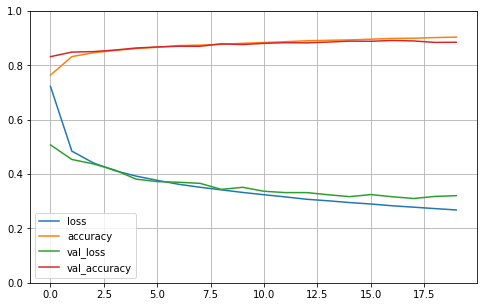

In [25]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model

In [26]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 262us/sample - loss: 57.0198 - accuracy: 0.8530


[57.019758102035524, 0.853]

In [27]:
X_new = X_test[:9]

In [28]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


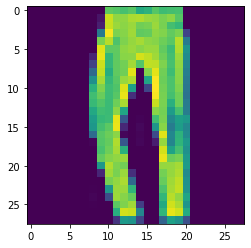

In [31]:
print(plt.imshow(X_new[5]))

In [32]:
print(confusion_matrix(y_test, y_pred))

[[803   6  17  45  13   0  96   0  20   0]
 [  0 975   0  16   4   0   3   0   2   0]
 [ 12   5 662  13 252   0  52   0   3   1]
 [ 15  30  14 867  54   0  14   0   6   0]
 [  0   1  34  28 917   0  17   0   3   0]
 [  0   0   0   0   0 938   0  17   5  40]
 [101   5  73  37 193   0 567   0  24   0]
 [  0   0   0   0   0  31   0 842   2 125]
 [  5   2   1   4   7   2   1   3 975   0]
 [  0   0   0   0   0   3   1  12   0 984]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.95      0.97      0.96      1000
           2       0.83      0.66      0.74      1000
           3       0.86      0.87      0.86      1000
           4       0.64      0.92      0.75      1000
           5       0.96      0.94      0.95      1000
           6       0.75      0.57      0.65      1000
           7       0.96      0.84      0.90      1000
           8       0.94      0.97      0.96      1000
           9       0.86      0.98      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



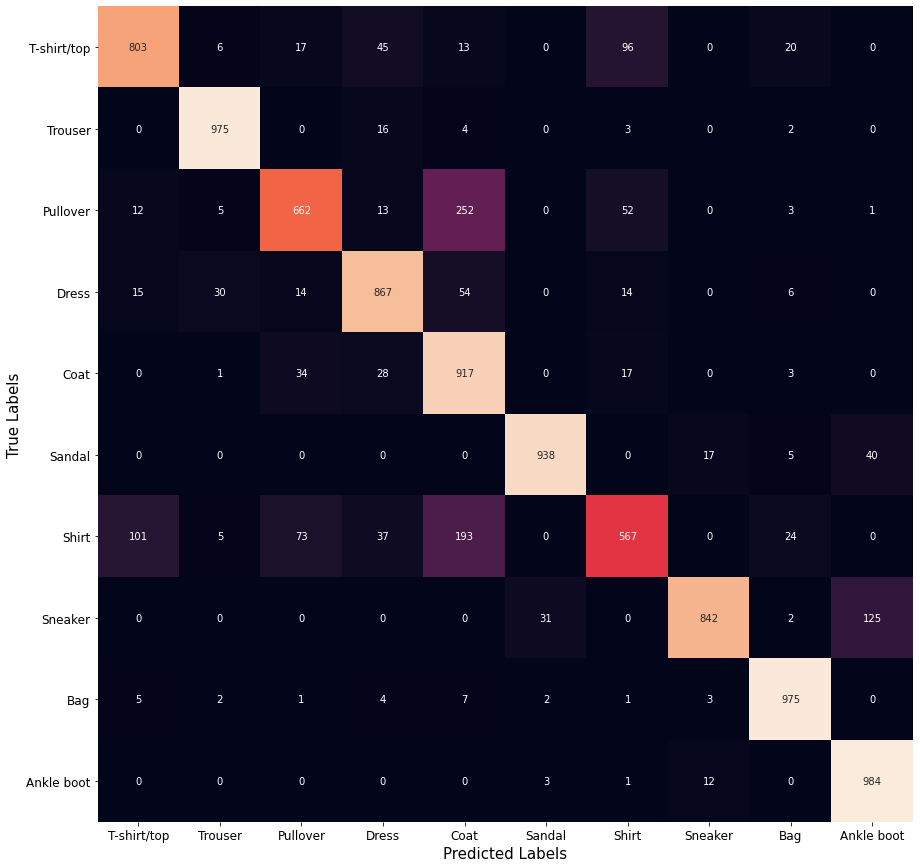

In [34]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='d')
ax.xaxis.set_ticklabels(class_names, fontsize = 12)
ax.yaxis.set_ticklabels(class_names, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Functional Model API

In [1]:
input_ = keras.layers.Input(shape=X_train.shape[28,28])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden2)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(10)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

NameError: name 'keras' is not defined